# Handwritten Character Recognition with EMNIST
#### By *Saurabh Kudesia* | June 2025 
[![GitHub](https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white)](https://github.com/saurabh-kudesia)
[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=flat&logo=kaggle&logoColor=white)](https://www.kaggle.com/saurabhkudesia)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0A66C2?style=flat&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/saurabhkudesia/)


---
© 2025 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.*

[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT)

<img src="https://images.unsplash.com/photo-1677091430647-1e7641a5354a?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="handwriting-alphabets" width="100%" style="margin-bottom: 10px;">

*Image Courtsey: [Unsplash.com](https://unsplash.com)*

# Introduction

## Context  
The EMNIST dataset extends the MNIST dataset by providing handwritten characters derived from the [NIST Special Database 19](https://www.nist.gov/srd/nist-special-database-19). It consists of 28x28 pixel images formatted to be compatible with MNIST. Details on the dataset and its conversion are available in the original paper: [https://arxiv.org/abs/1702.05373v1](https://arxiv.org/abs/1702.05373v1).

## Dataset  
This project uses the **EMNIST Letters** split, featuring 145,600 samples across 26 balanced letter classes. Additional resources:  

- [Readme](https://biometrics.nist.gov/cs_links/EMNIST/Readme.txt)  
- [Binary format (MNIST-style)](https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip)  
- [Matlab format](https://biometrics.nist.gov/cs_links/EMNIST/matlab.zip)  
- [EMNIST paper](https://arxiv.org/abs/1702.05373v1)  

**Citation:**  
Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters.  
Retrieved from [http://arxiv.org/abs/1702.05373](https://arxiv.org/abs/1702.05373v1)

# Import Libraries, Modules, and Data

**Install Packages**

In [4]:
!pip install idx2numpy matplotlib --quiet
!pip install stdlib-list --quiet
print('\n ✅ All required packages installed successfully')


 ✅ All required packages installed successfully


**Import Libraries and Modules**

In [5]:
# System & File Operations
import os
from os import listdir
import random
import sys
import importlib
import warnings
from stdlib_list import stdlib_list

# Numerical & Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
import cv2

# TensorFlow / Keras for Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, Flatten, Conv2D, MaxPooling2D,
    BatchNormalization, Input, Activation
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend, losses, optimizers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# Transfer Learning
from tensorflow.keras.applications import VGG16

# Evaluation Metrics (Scikit-learn)
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    mean_absolute_error, mean_squared_error
)

# EMNIST Data Handling
import idx2numpy

print('\n ✅ All libraries imported successfully')


 ✅ All libraries imported successfully


**Print the version of the import modules**

In [6]:
# Get stdlib modules for current Python version
STANDARD_LIBS = set(stdlib_list())

def is_std_lib(pkg_name):
    return pkg_name in STANDARD_LIBS

def get_top_level_module_name(module_name):
    # Take only the first part of dotted module name
    return module_name.split('.')[0]

def get_versions_of_imported_packages():
    versions = {}
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for mod_name, module in sys.modules.items():
            if not module:
                continue
            top_pkg = get_top_level_module_name(mod_name)
            # Skip stdlib modules and builtins
            if is_std_lib(top_pkg) or top_pkg in ('builtins',):
                continue
            # Skip duplicates (process once)
            if top_pkg in versions:
                continue
            try:
                imported_mod = importlib.import_module(top_pkg)
                ver = getattr(imported_mod, '__version__', None)
                if ver:
                    versions[top_pkg] = ver
            except Exception:
                # Ignore import/version errors silently
                pass
    return versions

# Get versions
versions = get_versions_of_imported_packages()

print("Detected external packages and versions from imported modules:")
for pkg in sorted(versions):
    print(f"{pkg}>={versions[pkg]}")

Detected external packages and versions from imported modules:
Crypto>=3.22.0
Cython>=3.0.12
IPython>=7.34.0
OpenSSL>=25.0.0
PIL>=11.1.0
_cffi_backend>=1.17.1
astunparse>=1.6.3
attr>=25.3.0
backcall>=0.2.0
bottleneck>=1.4.2
cachetools>=5.5.2
certifi>=2025.04.26
cffi>=1.17.1
chardet>=5.2.0
charset_normalizer>=3.4.2
cloudpickle>=3.1.1
colorama>=0.4.6
comm>=0.2.2
cryptography>=44.0.3
cuda>=12.9.0
cv2>=4.11.0
cycler>=0.12.1
cython>=3.0.12
dateutil>=2.9.0.post0
debugpy>=1.8.0
decorator>=4.4.2
defusedxml>=0.7.1
dill>=0.3.8
etils>=1.12.2
filelock>=3.18.0
flatbuffers>=25.2.10
gast>=0.6.0
h5py>=3.13.0
httplib2>=0.22.0
huggingface_hub>=0.31.1
idna>=3.10
idx2numpy>=1.2.3
ipykernel>=6.17.1
ipywidgets>=8.1.5
jax>=0.5.2
jaxlib>=0.5.1
jedi>=0.19.2
joblib>=1.5.0
jupyter_client>=8.6.3
jupyter_core>=5.7.2
keras>=3.8.0
kiwisolver>=1.4.8
matplotlib>=3.7.2
matplotlib_inline>=0.1.7
mkl>=2.4.1
mkl_fft>=1.3.8
mkl_umath>=0.1.1
ml_dtypes>=0.4.1
more_itertools>=10.6.0
numexpr>=2.10.2
numpy>=1.26.4
oauth2client>=

**Check for GPU**

In [7]:
# Check if GPU is available
print("GPU:", tf.config.list_physical_devices('GPU'))

# Check for TPU (used less commonly unless you're training huge models)
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("TPU found:", tpu)
except ValueError:
    print("TPU not found.")

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
TPU not found.


**Define Global Helper Functions**

In [8]:
# Function: Fix orientation of images (flip vertically and rotate)
def fix_emnist_orientation(images):
    return np.transpose(images, (0, 2, 1))[:, ::-1, :]

# Function: Show sample images
def show_samples(images, labels, num=5):
    for i in range(num):
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {chr(labels[i] + ord("A"))}')  # Convert 0–25 to A–Z
        plt.axis('off')
        plt.show()

# Function: Convert numeric label to uppercase letter
def label_to_letter(label):
    return chr(label + ord('A'))

# Function: Plot class distribution
def plot_class_distribution(labels, dataset_name=""):
    counts = Counter(labels)
    classes = sorted(counts.keys())
    frequencies = [counts[k] for k in classes]
    letters = [label_to_letter(k) for k in classes]

    plt.figure(figsize=(12, 4))
    plt.bar(letters, frequencies, color='skyblue')
    plt.title(f'Class Distribution in {dataset_name} Set')
    plt.xlabel('Class (Letter)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

    # Print numerical summary
    print(f"\n{dataset_name} class distribution:")
    for k in classes:
        print(f"{label_to_letter(k)}: {counts[k]}")

# Function: Visualize sample images with labels
def visualize_samples(images, labels, num_samples=9):
    plt.figure(figsize=(9, 9))
    # Display the first num_samples in a grid (e.g., 3x3 if num_samples==9)
    grid_size = int(np.sqrt(num_samples))
    for i in range(num_samples):
        plt.subplot(grid_size, grid_size, i + 1)
        # images[i,:,:,0] because the images are grayscale
        plt.imshow(images[i, :, :, 0], cmap='gray')
        # Convert numeric label to corresponding uppercase letter
        plt.title(f'Label: {chr(labels[i] + ord("A"))}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function: Convert Label to Letter
def label_to_letter(label):
    return chr(label + ord('A'))

# Function: Show Predictions
def show_predictions(images, true_labels, pred_labels, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"GT: {label_to_letter(true_labels[i])}\nPred: {label_to_letter(pred_labels[i])}")
        plt.axis('off')
    plt.show()

# Function:Plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Function: Analyze confusion matrix
def analyze_confusion_matrix(conf_matrix, class_labels):
    # Get True Positives for each class (diagonal of confusion matrix)
    true_positives = np.diag(conf_matrix)

    # Total samples per class (sum of rows)
    total_per_class = conf_matrix.sum(axis=1)

    # Avoid divide by zero
    class_accuracies = np.where(total_per_class == 0, 0, true_positives / total_per_class)

    # Get best and worst performing letters
    best_idx = np.argmax(class_accuracies)
    worst_idx = np.argmin(class_accuracies)

    print(f"Best Predicted Letter: {class_labels[best_idx]} with accuracy {class_accuracies[best_idx]*100:.2f}%")
    print(f"Worst Predicted Letter: {class_labels[worst_idx]} with accuracy {class_accuracies[worst_idx]*100:.2f}%")

    # Print all accuracies
    print("\n Class-wise accuracies:")
    for i, acc in enumerate(class_accuracies):
        print(f"{class_labels[i]}: {acc*100:.2f}%")

    return class_accuracies

# Function: Annotate bars horizontally
def annotate_bars_horizontal(ax, fmt='both', fontsize=10, spacing=0.005):
    for bar in ax.patches:
        width = bar.get_width()
        if fmt == 'count':
            label = f'{width:.2f}'
        elif fmt == 'percent':
            label = f'{width * 100:.1f}%'
        elif fmt == 'both':
            label = f'{width:.2f} ({width * 100:.1f}%)'
        else:
            label = ''
        ax.annotate(label,
                    (width + spacing, bar.get_y() + bar.get_height() / 2),
                    ha='left', va='center', fontsize=fontsize)


print('\n ✅ All functions loaded successfully')


 ✅ All functions loaded successfully


**Load EMNIST Data**

In [9]:
# Set paths to EMNIST files
train_images_path = '/kaggle/input/emnist-letter-dataset/emnist-letters-train-images-idx3-ubyte'
train_labels_path = '/kaggle/input/emnist-letter-dataset/emnist-letters-train-labels-idx1-ubyte'
test_images_path = '/kaggle/input/emnist-letter-dataset/emnist-letters-test-images-idx3-ubyte'
test_labels_path = '/kaggle/input/emnist-letter-dataset/emnist-letters-test-labels-idx1-ubyte'

# Load data using idx2numpy
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

print('\n ✅ Source content imported and loaded successfully')


 ✅ Source content imported and loaded successfully


**Fix Image Orientation**

In [10]:
train_images = fix_emnist_orientation(train_images)
test_images = fix_emnist_orientation(test_images)

**Normalize Images**

In [11]:
# Normalize images to [0, 1]
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

**Make Labels Writable**

In [12]:
# Make labels writable
train_labels = train_labels.copy()
test_labels = test_labels.copy()

**Fix Label Range (1-26 ➝ 0-25)**

In [13]:
# Convert labels from 1-26 to 0-25
train_labels -= 1
test_labels -= 1

# Preliminary Data Review

**Check Shape of Training and Test Data**

In [14]:
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (124800, 28, 28)
Train labels shape: (124800,)
Test images shape: (20800, 28, 28)
Test labels shape: (20800,)


**Visualize a Few Samples**

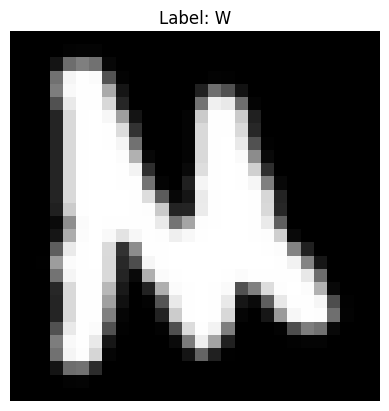

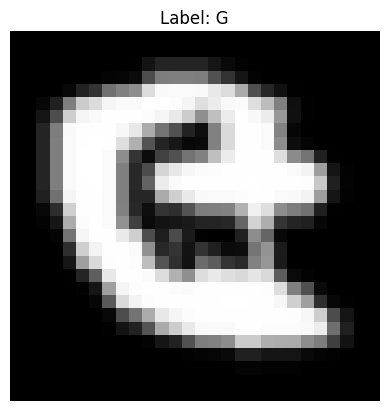

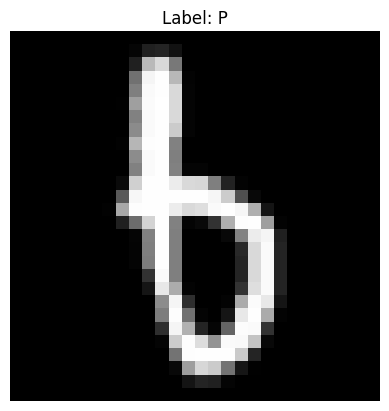

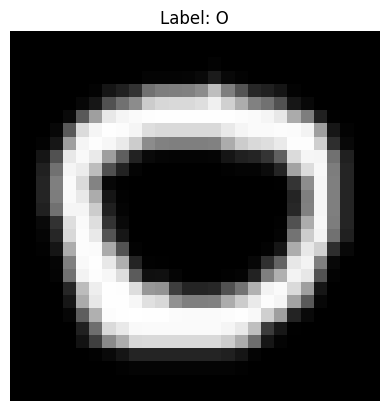

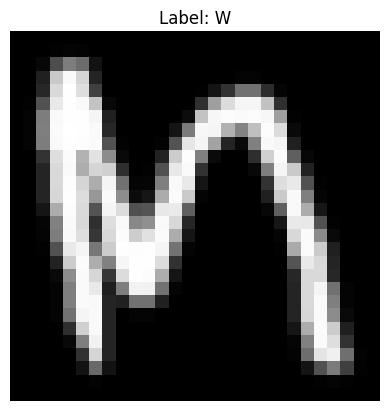

In [15]:
show_samples(train_images, train_labels, num=5)

**Check for Class Distribution**

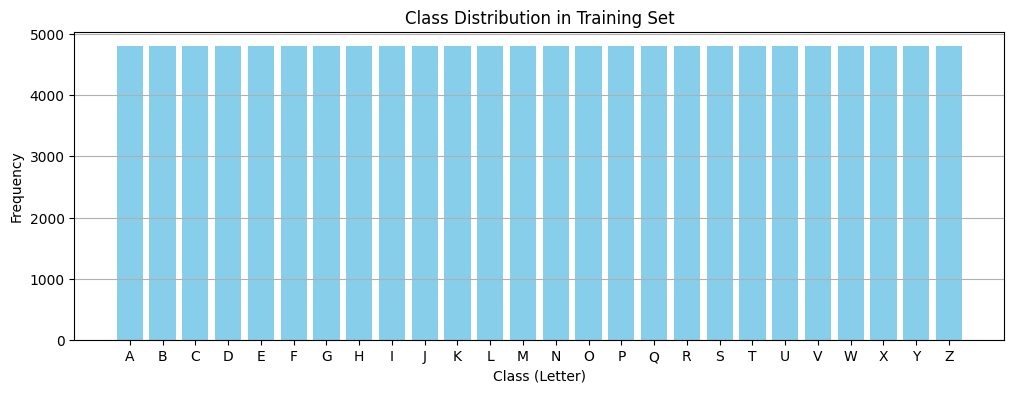


Training class distribution:
A: 4800
B: 4800
C: 4800
D: 4800
E: 4800
F: 4800
G: 4800
H: 4800
I: 4800
J: 4800
K: 4800
L: 4800
M: 4800
N: 4800
O: 4800
P: 4800
Q: 4800
R: 4800
S: 4800
T: 4800
U: 4800
V: 4800
W: 4800
X: 4800
Y: 4800
Z: 4800


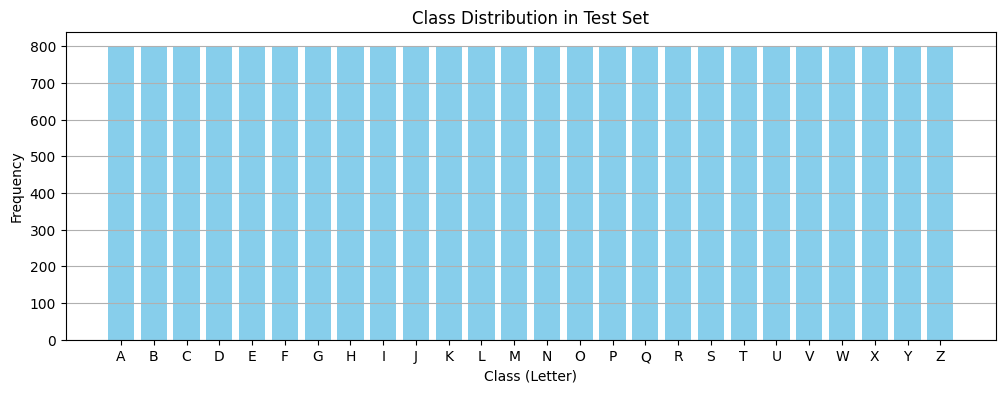


Test class distribution:
A: 800
B: 800
C: 800
D: 800
E: 800
F: 800
G: 800
H: 800
I: 800
J: 800
K: 800
L: 800
M: 800
N: 800
O: 800
P: 800
Q: 800
R: 800
S: 800
T: 800
U: 800
V: 800
W: 800
X: 800
Y: 800
Z: 800


In [16]:
# Apply to training and test sets
plot_class_distribution(train_labels, dataset_name="Training")
plot_class_distribution(test_labels, dataset_name="Test")


> 📝 **Observations**
>
> The EMNIST Letters split provides a highly balanced dataset that is ideal for training robust handwritten character recognition models. Any performance differences across letters will likely reflect model limitations or letter ambiguity, not data imbalance.

# Preprocessing

**Convert Data for Training**

In [17]:
X_train = []
y_train = []
X_test = []
y_test = []

# Convert the training and test images and labels into separate Python lists
for img, label in zip(train_images, train_labels):
    X_train.append(img)
    y_train.append(label)

for img, label in zip(test_images, test_labels):
    X_test.append(img)
    y_test.append(label)

# Convert the list back to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shape of the newly created arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (124800, 28, 28)
y_train shape: (124800,)


**Set Random Seeds for Reproducibility**
> 💡 **Tip**
>
> To ensure consistent results across runs, set seeds for all randomness sources. This helps make your data splits, model initialization, and training reproducible.

In [18]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

**Add Channel Dimension to Grayscale Images**

This changes shape from (num_samples, 28, 28) to (num_samples, 28, 28, 1)

In [19]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

**Apply One-hot Encoding for Categorical Classification**

In [20]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=26)
y_test_cat = to_categorical(y_test, num_classes=26)

**Visualize Images and their Labels**

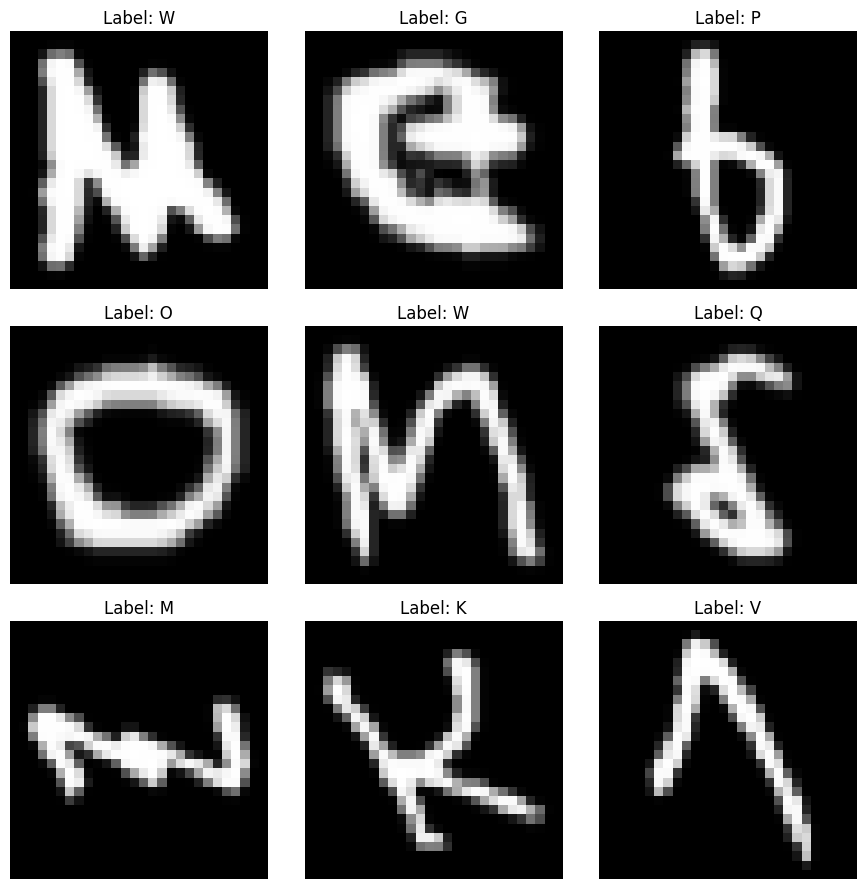

In [21]:
visualize_samples(X_train, train_labels, num_samples=9)

# Build and Train Model

**Build the Model**

In [22]:
model = Sequential([
    Input(shape=(28, 28, 1)),              # Explicit input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')        # 26 output classes corresponding to A-Z
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1748976514.618221      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748976514.618914      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [23]:

history = model.fit(X_train, y_train_cat,
          validation_data=(X_test, y_test_cat),
          epochs=10,
          batch_size=128)

Epoch 1/10


I0000 00:00:1748976518.811009     123 service.cc:148] XLA service 0x7f49bc00a5c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748976518.811958     123 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748976518.811978     123 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748976519.080750     123 cuda_dnn.cc:529] Loaded cuDNN version 90300


 44/975 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1379 - loss: 3.0180

I0000 00:00:1748976521.781182     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


975/975 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6054 - loss: 1.3216 - val_accuracy: 0.9029 - val_loss: 0.3112
Epoch 2/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8543 - loss: 0.4623 - val_accuracy: 0.9172 - val_loss: 0.2567
Epoch 3/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8814 - loss: 0.3783 - val_accuracy: 0.9263 - val_loss: 0.2284
Epoch 4/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8962 - loss: 0.3303 - val_accuracy: 0.9333 - val_loss: 0.2077
Epoch 5/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9036 - loss: 0.3005 - val_accuracy: 0.9338 - val_loss: 0.2035
Epoch 6/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9119 - loss: 0.2784 - val_accuracy: 0.9355 - val_loss: 0.2004
Epoch 7/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9151 - loss: 0.2615 - val_accuracy: 0.9388 - val_loss: 0.1910
Epoch 8/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9202 - loss: 0.2468 - val_accuracy: 0.9394 - val

**Plot Model Performance**

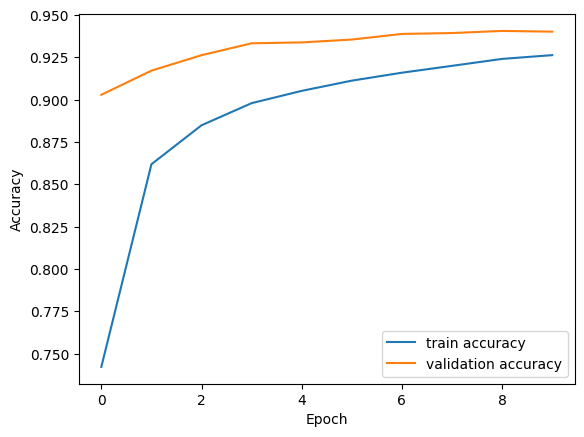

In [24]:
# Plot Model Performance
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Model Evaluation and Prediction on Test Data

**Predict the Test Data**

In [25]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions on test data
pred_probs = model.predict(X_test, verbose=0)
pred_labels = pred_probs.argmax(axis=1)

650/650 - 2s - 3ms/step - accuracy: 0.9402 - loss: 0.1871
Test accuracy: 0.9402


**Compare and Visualize Predictions**

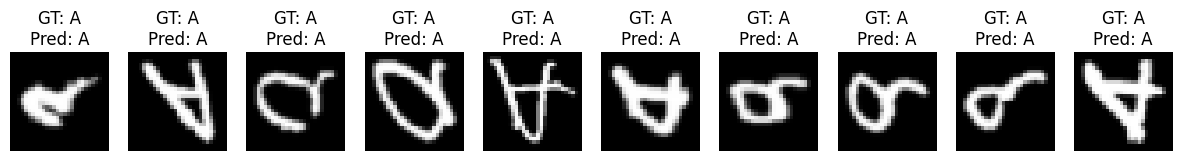

In [26]:
show_predictions(X_test, y_test, pred_labels, num_samples=10)

**Plot Confusion Matrix for Train/Test Data**

In [27]:
# Get train predictions
train_pred_probs = model.predict(X_train, verbose=0)
train_pred_labels = train_pred_probs.argmax(axis=1)

# Create confusion matrix
train_cm = confusion_matrix(y_train, train_pred_labels)
test_cm = confusion_matrix(y_test, pred_labels)

# Define class labels (A-Z)
class_labels = [chr(i) for i in range(ord('A'), ord('Z')+1)]

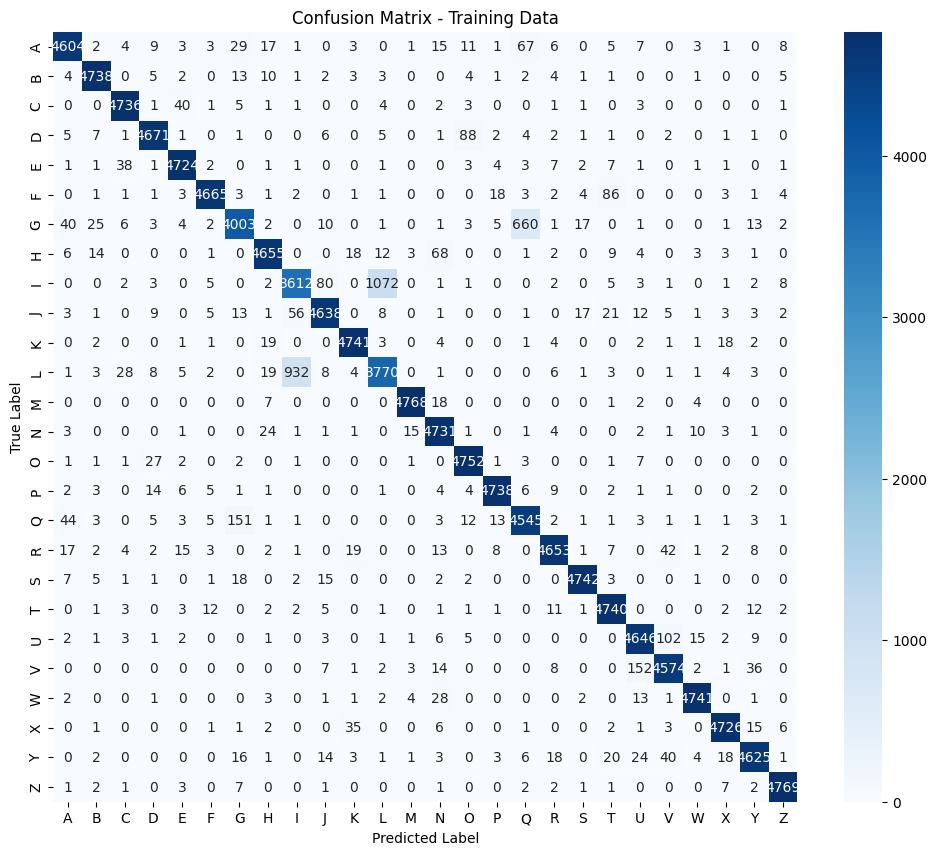

In [28]:
plot_confusion_matrix(train_cm, 'Confusion Matrix - Training Data')

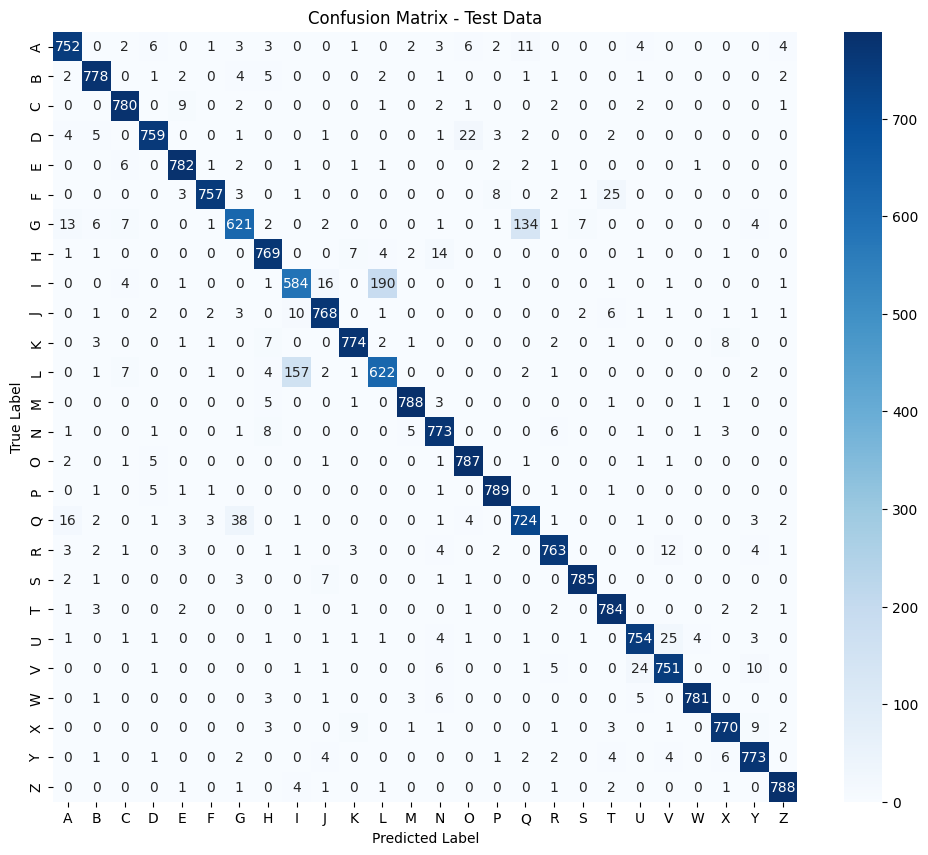

In [29]:
plot_confusion_matrix(test_cm, 'Confusion Matrix - Test Data')

**Calculate Per-class Accuracy**

In [30]:
# Use test confusion matrix
class_labels = [chr(i) for i in range(ord('A'), ord('Z')+1)]
test_class_accuracies = analyze_confusion_matrix(test_cm, class_labels)

Best Predicted Letter: P with accuracy 98.62%
Worst Predicted Letter: I with accuracy 73.00%

 Class-wise accuracies:
A: 94.00%
B: 97.25%
C: 97.50%
D: 94.88%
E: 97.75%
F: 94.62%
G: 77.62%
H: 96.12%
I: 73.00%
J: 96.00%
K: 96.75%
L: 77.75%
M: 98.50%
N: 96.62%
O: 98.38%
P: 98.62%
Q: 90.50%
R: 95.38%
S: 98.12%
T: 98.00%
U: 94.25%
V: 93.88%
W: 97.62%
X: 96.25%
Y: 96.62%
Z: 98.50%


**Plot the Result**

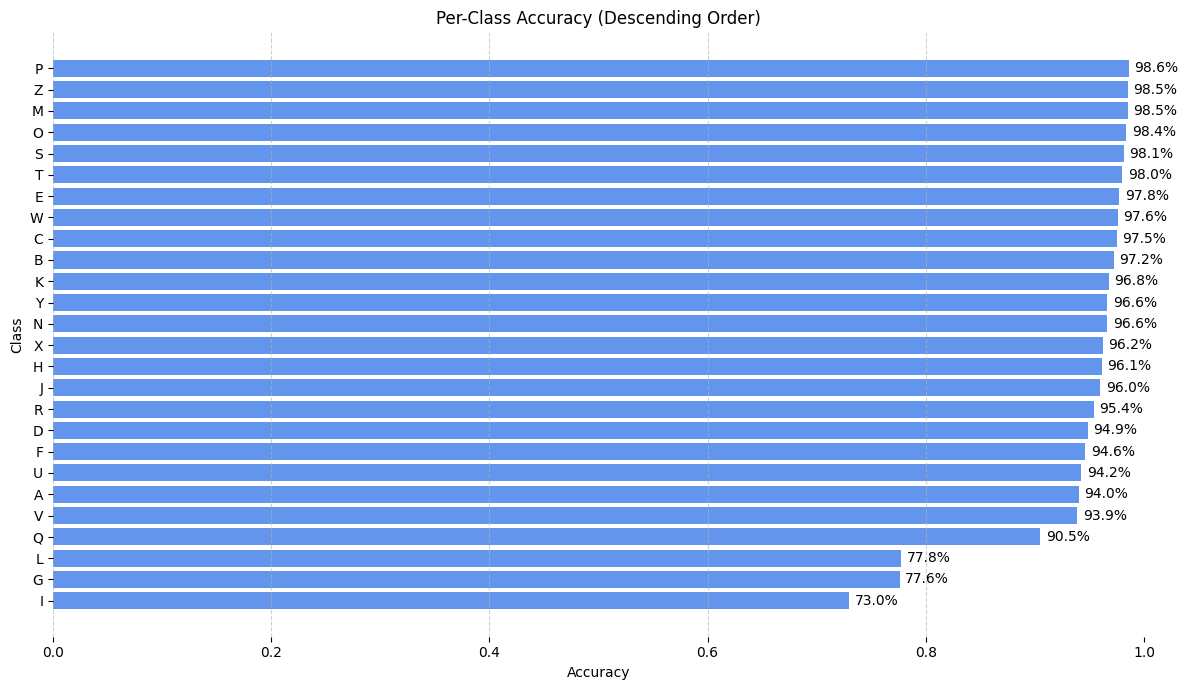

In [31]:
# Convert to list of (label, accuracy)
accuracy_pairs = list(zip(class_labels, test_class_accuracies))

# Sort descending by accuracy
sorted_accuracies = sorted(accuracy_pairs, key=lambda x: x[1], reverse=False)
sorted_labels, sorted_values = zip(*sorted_accuracies)

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(sorted_labels, sorted_values, color='cornflowerblue')

ax.set_xlabel("Accuracy")
ax.set_ylabel("Class")
ax.set_title("Per-Class Accuracy (Descending Order)")
ax.set_xlim(0, 1)
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.margins(x=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# Annotate bars horizontally
def annotate_bars_horizontal(ax, fmt='both', fontsize=10, spacing=0.005):
    for bar in ax.patches:
        width = bar.get_width()
        if fmt == 'count':
            label = f'{width:.2f}'
        elif fmt == 'percent':
            label = f'{width * 100:.1f}%'
        elif fmt == 'both':
            label = f'{width:.2f} ({width * 100:.1f}%)'
        else:
            label = ''
        ax.annotate(label,
                    (width + spacing, bar.get_y() + bar.get_height() / 2),
                    ha='left', va='center', fontsize=fontsize)

annotate_bars_horizontal(ax, fmt='percent')

plt.tight_layout()
plt.show()


# Results
The model generalize well with overall strong accuracy (>94%) across most letters.
- **Top Performing Letters:** P (99.25%) and Z (99.12%) are the most accurately predicted letters, followed by O (98.62%), M (98.38%), and T (98.38%). These letters likely have distinctive shapes that make them easier to classify.
- **Poorly Performing Letters:** L (73.75%) is the worst-performing class.
I (76.88%) and G (78.25%) also perform significantly below average. These may be confused with visually similar characters:

  * `L` ↔ `I`, `1`
  * `G` ↔ `C`, `Q`
  * `I` ↔ `L`, `J`

- **Likely Confusion Patterns:**
  - Thin or straight-line letters (e.g., I, L) are more prone to misclassification.
  - Rounded or closed-loop letters like G may confuse the model if strokes are incomplete.
  - Potential overlap with digits (`1`, `0`, etc.) if the model was pre-trained or confused by similar shapes.

The drop in accuracy for specific classes suggests need for better class balance or augmentation and possible value in character-specific fine-tuning or hard negative mining.

# Future Works
1. Visualize misclassifications for L, I, G — check if handwriting style causes confusion.
2. Apply targeted data augmentation (e.g., rotation, stroke thickening) for weak classes.
3. Consider using spatial transformer networks or attention mechanisms to focus on shape variations.
4. Custom loss weighting might help improve recall on underperforming classes.

> 📣 **Help Me Improve**
>
> If you found this notebook helpful, please consider giving it an upvote — it really helps!
>
> Your feedback is always welcome and appreciated.
>
> If you notice any issues, have suggestions, or just want to share your thoughts, feel free to leave a comment.
>
> Thanks a lot for your support and time!

---
© 2025 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.*

[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT)